In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('C:\\Users\\91994\\Downloads\\titanic\\train.csv')


In [5]:
correlation_matrix = titanic_data.describe()

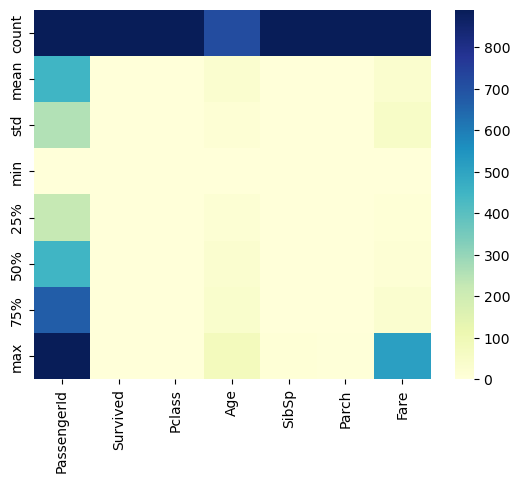

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

In [7]:
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64']).columns

In [8]:
numeric_data = titanic_data[numeric_columns]

In [9]:
correlation_matrix = numeric_data.corr()

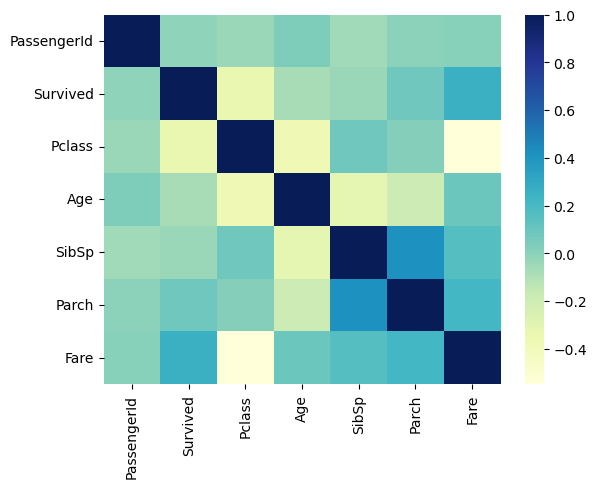

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

In [11]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

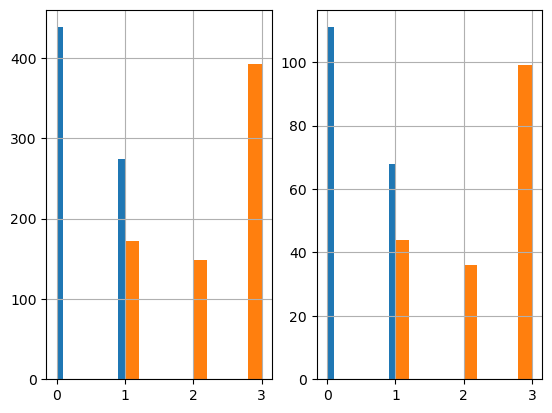

In [13]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()


In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 873 to 264
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          580 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = impute.fit_transform(X[['Age']])
        return X


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()

        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")


In [18]:
from sklearn.pipeline import Pipeline
pipeline =Pipeline([("ageimputer" , AgeImputer()),
                  ("featureencoder" , FeatureEncoder()),
                  ("featureDropper" , FeatureDropper())])

In [19]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 873 to 264
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          580 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'Name' and 'Sex' are non-numeric columns, drop them from X
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

# Define transformers for numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations
X_data = preprocessor.fit_transform(X)
y_data = y.to_numpy()


In [21]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_data_imputed = imputer.fit_transform(X_data)


In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming X_data is a sparse matrix
imputer = SimpleImputer(strategy='mean')
X_data_imputed = imputer.fit_transform(X_data)

# Now, you can use the StandardScaler with with_mean=False
scaler = StandardScaler(with_mean=False)
X_data_scaled = scaler.fit_transform(X_data_imputed)


In [23]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.imputer = SimpleImputer(strategy='mean')
        self.imputer.fit(X[['Age']])
        return self

    def transform(self, X):
        X['Age'] = self.imputer.transform(X[['Age']])
        return X


In [24]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Assuming X_data is a sparse matrix
X_data_numeric = X_data[:, X_data.getnnz(0) > 0]

scaler = StandardScaler(with_mean=False)  # Set with_mean=False
X_data_scaled = scaler.fit_transform(X_data_numeric)


In [25]:
from sklearn.impute import SimpleImputer

# Assuming X_data_scaled is a sparse matrix
imputer = SimpleImputer(strategy="mean")  # You can choose a different strategy if needed
X_data_imputed = imputer.fit_transform(X_data_scaled)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_imputed, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [69]:
final_clf = grid_search.best_estimator_


In [70]:
final_clf

RandomForestClassifier(n_estimators=500)

In [72]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

pipeline = Pipeline([
    ('age_imputer', AgeImputer()),
    # other transformers and your classifier
])

strat_test_set = pipeline.fit_transform(strat_test_set)


In [73]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.000000,0,0,PC 17485,56.9292,E36,C
852,853,0,3,"Boulos, Miss. Nourelain",female,9.000000,1,1,2678,15.2458,NaN,C
368,369,1,3,"Jermyn, Miss. Annie",female,30.069225,0,0,14313,7.7500,NaN,Q
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.000000,1,0,11753,52.5542,D19,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.500000,0,0,2683,6.4375,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.000000,1,0,2003,26.0000,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.7500,NaN,Q
364,365,0,3,"O'Brien, Mr. Thomas",male,30.069225,1,0,370365,15.5000,NaN,Q
253,254,0,3,"Lobb, Mr. William Arthur",male,30.000000,1,0,A/5. 3336,16.1000,NaN,S


In [104]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']

In [105]:
scaler=StandardScaler()

In [110]:
# Drop non-numeric columns (you might need to adjust this based on your specific columns)
non_numeric_columns = ['Name', 'Ticket', 'Cabin']
X_test_numeric = X_test_encoded.drop(non_numeric_columns, axis=1)

# Now, you can use the StandardScaler
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test_numeric)


In [119]:
y_data_test=y_test.to_numpy()

In [121]:
final_data=pipeline.fit_transform(titanic_data)

In [122]:
final_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [132]:
X_final = final_data.drop(['Survived', 'Name'], axis=1)


In [136]:
columns_to_encode = ['Sex']
X_final = pd.get_dummies(X_final, columns=columns_to_encode)


In [138]:
# Exclude non-numeric columns from scaling
numeric_columns = X_final.select_dtypes(include=['number']).columns
X_numeric = X_final[numeric_columns]

# Scale only the numeric columns
X_data_final = scaler.fit_transform(X_numeric)


In [139]:
y_data_final=y_final.to_numpy()

In [140]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_imputed, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [142]:
prod_final_clf = grid_search.best_estimator_


In [143]:
prod_final_clf

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [145]:
titanic_test_data = pd.read_csv("C:\\Users\\91994\\Downloads\\titanic\\test.csv")

In [146]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [147]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [148]:
final_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [161]:
from sklearn.preprocessing import StandardScaler


In [162]:
numeric_columns = X_test.select_dtypes(include=['number']).columns
X_numeric_test = X_test[numeric_columns]


In [163]:
non_numeric_columns = X_test.select_dtypes(exclude=['number']).columns
X_non_numeric_test = X_test[non_numeric_columns]


In [166]:
# Check for missing values in the numeric columns
print(X_test.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          141
Embarked         1
dtype: int64


In [167]:
# Assuming X_test is your test data
numeric_columns = X_test.select_dtypes(include=['number']).columns
X_numeric_test = X_test[numeric_columns]

# Handle non-numeric columns (e.g., one-hot encoding for categorical variables)
X_non_numeric_test = pd.get_dummies(X_test.select_dtypes(exclude=['number']))


In [170]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

In [182]:
X_final_test=final_test_data
X_final_test= X_final_test.fillna(method="ffill")



In [200]:
scaler=StandardScaler()


In [201]:
X_final_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,C78,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,C105,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,C105,S


In [203]:
final_df = pd.DataFram(titanic_test_data['PassengerID'])
final_df.to_csv("C:\Users\91994\Downloads\titanic\gender_submission.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1746077882.py, line 2)

In [205]:
final_df = pd.DataFrame(titanic_test_data['PassengerID'])

KeyError: 'PassengerID'

In [206]:
print(titanic_test_data.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [207]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])


In [208]:
final_df.to_csv("C:\Users\91994\Downloads\titanic\gender_submission.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2726610863.py, line 1)

In [209]:
final_df.to_csv(r"C:\Users\91994\Downloads\titanic\gender_submission.csv")


In [210]:
final_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308
